<div style="background-color: #058212; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Análisis estadístico descriptivo completo de dataset de empleados</h1>
</div>

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Cargar librerías</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Crear y explorar dataset de empleados</h2>
</div>

In [2]:
# Crear dataset de empleados

np.random.seed(42)
n_empleados = 500

df = pd.DataFrame({
    'id_empleado': range(1, n_empleados + 1),
    'edad': np.random.normal(35, 8, n_empleados).clip(22, 65).astype(int),
    'salario': np.random.lognormal(10.5, 0.4, n_empleados).round(0),
    'años_experiencia': np.random.normal(8, 4, n_empleados).clip(0, 30).astype(int),
    'departamento': np.random.choice(['IT', 'Ventas', 'Marketing', 'RRHH', 'Finanzas'], n_empleados),
    'nivel': np.random.choice(['Junior', 'Senior', 'Lead', 'Manager'], n_empleados, p=[0.4, 0.4, 0.15, 0.05])
})

print(f"Dataset creado: {df.shape[0]} empleados")
print(f"Columnas: {list(df.columns)}")

Dataset creado: 500 empleados
Columnas: ['id_empleado', 'edad', 'salario', 'años_experiencia', 'departamento', 'nivel']


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de medidas de tendencia central</h2>
</div>

In [3]:
# Estadísticos básicos
print("MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 40)

# Variables numéricas
for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Moda: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'Sin moda única'}")

# Variables categóricas
print(f"\nDEPARTAMENTO MÁS COMÚN: {df['departamento'].mode().iloc[0]}")
print(f"NIVEL MÁS COMÚN: {df['nivel'].mode().iloc[0]}")

MEDIDAS DE TENDENCIA CENTRAL

EDAD:
  Media: 34.69
  Mediana: 35.00
  Moda: 35

SALARIO:
  Media: 39715.18
  Mediana: 36732.00
  Moda: 23566.0

AÑOS_EXPERIENCIA:
  Media: 7.97
  Mediana: 8.00
  Moda: 8

DEPARTAMENTO MÁS COMÚN: RRHH
NIVEL MÁS COMÚN: Senior


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de dispersión</h2>
</div>

In [4]:
print("\n\nMEDIDAS DE DISPERSIÓN")
print("=" * 30)

for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")
    print(f"  Rango: {df[col].max() - df[col].min()}")
    print(f"  Varianza: {df[col].var():.2f}")
    print(f"  Desviación estándar: {df[col].std():.2f}")
    print(f"  Coeficiente de variación: {df[col].std() / df[col].mean():.3f}")



MEDIDAS DE DISPERSIÓN

EDAD:
  Rango: 43
  Varianza: 57.44
  Desviación estándar: 7.58
  Coeficiente de variación: 0.218

SALARIO:
  Rango: 91736.0
  Varianza: 262243168.52
  Desviación estándar: 16193.92
  Coeficiente de variación: 0.408

AÑOS_EXPERIENCIA:
  Rango: 18
  Varianza: 15.57
  Desviación estándar: 3.95
  Coeficiente de variación: 0.495


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de percentiles y distribución</h2>
</div>

In [5]:
print("\n\nANÁLISIS DE PERCENTILES")
print("=" * 25)

for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")
    percentiles = df[col].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
    for p, v in percentiles.items():
        print(f"  P{int(p*100)}: {v:.2f}")
    
    # Rango intercuartílico
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    print(f"  IQR: {iqr:.2f}")
    
    # Límites para outliers
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr
    outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
    print(f"  Outliers (IQR): {outliers}")



ANÁLISIS DE PERCENTILES

EDAD:
  P10: 25.00
  P25: 29.00
  P50: 35.00
  P75: 40.00
  P90: 45.00
  IQR: 11.00
  Outliers (IQR): 2

SALARIO:
  P10: 21990.90
  P25: 28620.75
  P50: 36732.00
  P75: 47121.75
  P90: 61840.40
  IQR: 18501.00
  Outliers (IQR): 19

AÑOS_EXPERIENCIA:
  P10: 3.00
  P25: 5.00
  P50: 8.00
  P75: 11.00
  P90: 13.00
  IQR: 6.00
  Outliers (IQR): 0


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis por categorías</h2>
</div>

In [6]:
print("\n\nANÁLISIS POR DEPARTAMENTO")
print("=" * 30)

dept_stats = df.groupby('departamento').agg({
    'salario': ['mean', 'median', 'std', 'count'],
    'edad': ['mean', 'min', 'max']
}).round(2)

print(dept_stats)

print("\n\nANÁLISIS POR NIVEL")
print("=" * 20)

nivel_stats = df.groupby('nivel').agg({
    'salario': 'mean',
    'años_experiencia': 'mean',
    'edad': 'mean'
}).round(2)

print(nivel_stats)



ANÁLISIS POR DEPARTAMENTO
               salario                            edad        
                  mean   median       std count   mean min max
departamento                                                  
Finanzas      39400.97  35745.0  17512.32    97  34.45  22  59
IT            39004.76  35310.0  16511.62   109  34.73  22  50
Marketing     39298.89  38299.0  14486.98   101  34.31  22  51
RRHH          40449.09  39102.0  14913.70   115  35.04  22  65
Ventas        40555.69  36957.5  18173.55    78  34.90  22  56


ANÁLISIS POR NIVEL
          salario  años_experiencia   edad
nivel                                     
Junior   39307.28              7.88  35.12
Lead     38850.40              8.37  34.92
Manager  40954.41              7.05  33.09
Senior   40309.09              7.96  34.38


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Comparación de medidas de tendencia central (media vs mediana)</h2>
</div>

In [7]:
def graficar_medidas_tendencia_central(df: pd.DataFrame, cols: list, ncols: int=3) -> None:

    nrows = len(cols) // ncols +  int((len(cols) % ncols) > 0)

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.5 * ncols, 3 * nrows))
    axs = axs.flatten()
    
    for i, col in enumerate(cols):
        ax = axs[i] 
        ax.hist(df[col], color='blue', bins=15, linewidth=0.5, edgecolor='blue', alpha=0.18) 
        ax.axvline(df[col].mean(), label=f'media: {df[col].mean():.2f}', color='red', linestyle='dashdot')
        q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
        ax.axvline(q2, label=f'mediana: {q2:.2f}', color='blue', linestyle='dashdot')
        iqr = q3 - q1
        limite_inf = q1 - 1.5 * iqr
        limite_sup = q3 + 1.5 * iqr
        ax.axvline(limite_inf, label='límites IQR', color='green', linestyle='dashed')
        ax.axvline(limite_sup, color='green', linestyle='dashed')
        ax.tick_params(axis='both', which='major', labelsize=8) 
        ax.set_title(f'Histograma de {col}', weight='bold', size=10)
        ax.legend(fontsize=8)
        ax.set_ylabel('Frecuencia', size=8)
        ax.set_xlabel(col, size=8)

    fig.suptitle('MEDIDAS DE TENDENCIA CENTRAL', weight='bold', y=1.0)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
        
    plt.tight_layout() 
    plt.show()

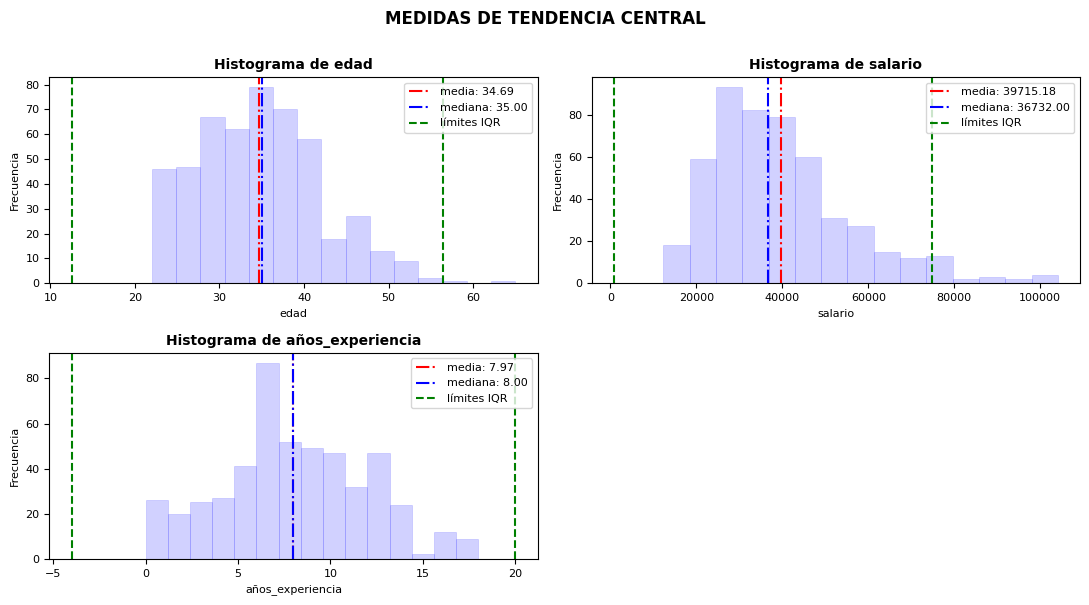

In [8]:
cols =  ['edad', 'salario', 'años_experiencia']
graficar_medidas_tendencia_central(df, cols, ncols=2)

Basándome en el análisis estadístico realizado sobre el dataset de empleados, puedo concluir lo siguiente respecto a la elección entre media y mediana como medidas de tendencia central:

**Variable "Edad"**
- Distribución: Simétrica con 2 outliers detectados
- Relación media-mediana: 34.69 vs 35.00 (prácticamente idénticas)
- Elección recomendada: Media
- Justificación: A pesar de la presencia de valores atípicos menores, la distribución conserva su carácter simétrico. En el contexto organizacional, la edad de los empleados suele seguir patrones de distribución normal, por lo que la media aritmética representa adecuadamente la tendencia central del conjunto de datos.

**Variable "Salario"**
- Distribución: Marcadamente asimétrica a la derecha con 19 outliers
- Relación media-mediana: 39,715.18 vs 36,732.00 (media mayor que la mediana)
- Elección recomendada: Mediana
- Justificación: La distribución lognormal de los salarios corporativos, sumada a la presencia de valores atípicos significativos en el extremo superior (como los salarios de directivos), distorsiona la media aritmética. La mediana, al ser una medida de tendencia central más robusta frente a estos valores extremos, ofrece una mejor representación del salario "típico".

**Variable "Años de Experiencia"**
- Distribución: Simétrica sin outliers detectados
- Relación media-mediana: 7.97 vs 8.00 (virtualmente equivalentes)
- Elección recomendada: Mediana
- Justificación: Si bien estadísticamente ambas medidas de tendencia central arrojan valores similares, en el contexto empresarial real es frecuente encontrar distribuciones bimodales. Estas distribuciones suelen mostrar concentraciones de empleados en los niveles junior (baja experiencia) y senior (alta experiencia). Ante este escenario, la mediana proporciona una robustez superior frente a posibles asimetrías o distribuciones bimodales que no se hayan reflejado adecuadamente en la simulación.

**Conclusión General**   
La elección entre media y mediana debe basarse tanto en las características estadísticas de la distribución como en el conocimiento del dominio. 